# Amazon Prime TV Shows

This data set was created so as to analyze the latest shows available on Amazon Prime as well as the shows with a high rating.

Variables: The data set contains the

1.name of the show or title,
2.year of the release which is the year in which the show was released or went on-air,
3.No.of seasons means the number of seasons of the show which are available on Prime,
4.Language is for the audio language of the show and does not take into consideration the language of the subtitles,
5.genre of the show like Kids, Drama, Action and so on,
6.IMDB ratings of the show: though for many tv shows and kid shows the rating was not available,
7.Age of Viewers is to specify the age of the target audience-
  All in age means that the content is not restricted to any particular age group and all audiences can view it.


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
#from wordcloud import WordCloud
#from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load and read the data

In [2]:
data=pd.read_csv("Prime TV Shows.csv")
data

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dropping Serial Number column

In [3]:
data.drop('S.no.',axis=1,inplace=True)     

# To check the rows and columns

In [4]:
data.shape

(404, 7)

# To print top 5 records

In [5]:
data.head()

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,Fleabag,2016.0,2.0,English,Comedy,8.7,18+


# To print bottom 5 records

In [6]:
data.tail()

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# To print columns names

In [7]:
data.columns

Index(['Name of the show', 'Year of release', 'No of seasons available',
       'Language', 'Genre', 'IMDb rating', 'Age of viewers'],
      dtype='object')

# To check the datatype

In [8]:
data.dtypes

Name of the show            object
Year of release            float64
No of seasons available    float64
Language                    object
Genre                       object
IMDb rating                float64
Age of viewers              object
dtype: object

# Statistical Details

In [9]:
data.describe()

,Year of release,No of seasons available,IMDb rating
count,393.000000,393.000000,182.000000
mean,2011.279898,2.608142,7.354396
std,12.944861,2.592008,0.959372
min,1926.000000,1.000000,3.700000
25%,2011.000000,1.000000,6.900000
50%,2016.000000,2.000000,7.500000
75%,2018.000000,3.000000,8.100000
max,2020.000000,20.000000,9.000000


# Plotting the statistical details

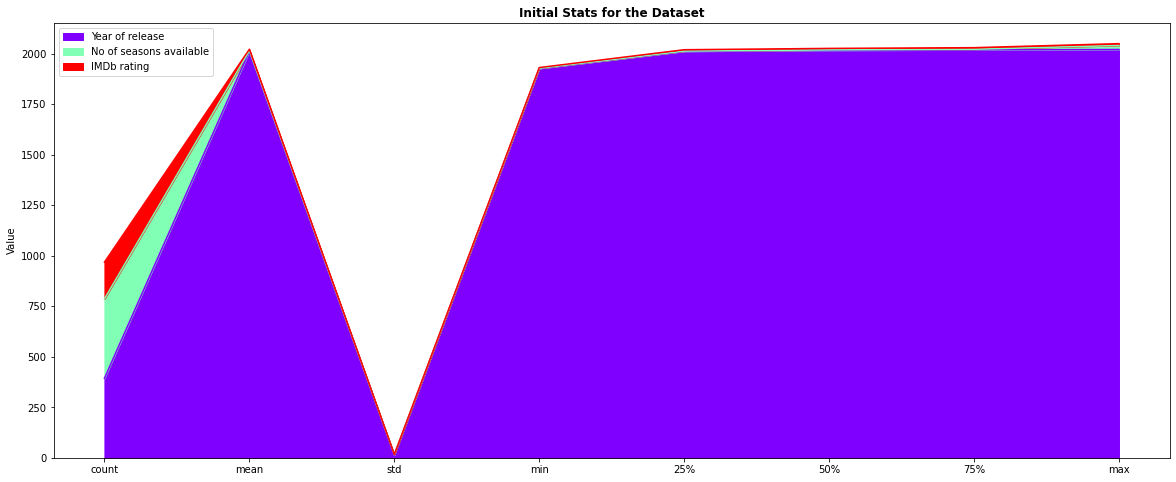

In [10]:
#Just trying to plot the above seen initial stats
data.describe().plot(kind='area',fontsize=10,figsize=(20,8),colormap='rainbow')
plt.title("Initial Stats for the Dataset",fontweight='bold')
plt.ylabel("Value")
plt.show()

What we can find from here:
    
* Min value for year of release - 1926? Seriously Dude? TV series from 1926? We will find out soon
* Series with maximum seasons available in Prime is 20. Ok. Binge watching 20 seasons, is it possible?
* IMDB ratings in the list are between the values - 3.7 - 9 ? Are you the one who really goes behind IMDBs?

# Sum of null values

In [11]:
data.isna().sum()

Name of the show            11
Year of release             11
No of seasons available     11
Language                    11
Genre                       11
IMDb rating                222
Age of viewers              11
dtype: int64

# Fill the null values

In [12]:
data['Name of the show'].fillna(data['Name of the show'].value_counts().index[0],inplace=True)
data['Year of release'].fillna((data['Year of release'].mean()),inplace=True)
data['No of seasons available'].fillna((data['No of seasons available'].mean()),inplace=True)
data['Language'].fillna(data['Language'].value_counts().index[0],inplace=True)
data['Genre'].fillna(data['Genre'].value_counts().index[0],inplace=True)
data['IMDb rating'].fillna((data['IMDb rating'].mean()),inplace=True)
data['Age of viewers'].fillna(data['Age of viewers'].value_counts().index[0],inplace=True)


# Check the null values

In [13]:
data.isna().sum()

Name of the show           0
Year of release            0
No of seasons available    0
Language                   0
Genre                      0
IMDb rating                0
Age of viewers             0
dtype: int64

# Number of unique values in every column

In [14]:
data.nunique()      

Name of the show           391
Year of release             47
No of seasons available     16
Language                    14
Genre                       49
IMDb rating                 41
Age of viewers               5
dtype: int64

# Print name of the shows and their counts

In [15]:
data['Name of the show'].unique()

array(['Pataal Lok', 'Upload', 'The Marvelous Mrs. Maisel',
       'Four More Shots Please', 'Fleabag', 'Made in Heaven',
       'Homecoming', 'Mirzapur', 'The Family Man', 'Modern Love',
       'Comicstaan', 'Inside Edge', 'The Boys', 'Hanna', 'Hunters',
       'Good Omens', 'Breathe', 'The Forgotten Army- Azaadi ke Liye',
       "Tom Clancy's Jack Ryan", 'Tales from the Loop',
       "The Test: A New Era for Australia's Team",
       'The Man in the High Castle', 'One Mic Stand', 'Undone',
       'American Gods', 'The Tick', 'Jestination Unknown',
       'Man with a Plan', 'Suits', 'Doctor Who', "Grey's Anatomy",
       'The Mentalist', 'Afsos', 'Laakhon Mein Ek', 'House',
       'The Good Doctor', 'The Vampire Diaries', 'Hostel Daze',
       'Mr. Robot', 'Supernatural', 'Dexter', 'The Magicians',
       'Blindspot', 'The Good Wife', 'The Girlfriend Experience',
       'Chacha Vidhayak Hain Humare', 'Scorpion', 'Shameless', 'Reign',
       'Downtown Abbey', 'McMafia', 'This is Us',
 

# Wordcloud showing the most frequent "Name of the show" released by Amazon prime'.

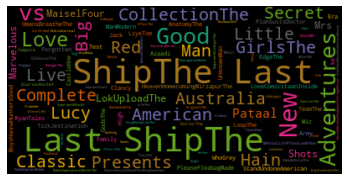

<Figure size 432x288 with 0 Axes>

In [16]:
stopwords = set(STOPWORDS)
wordcloudG=WordCloud(max_font_size=40, relative_scaling=.5,colormap="Dark2",stopwords=stopwords).generate(data['Name of the show'].str.cat())
plt.imshow(wordcloudG, interpolation="bilinear")
plt.axis('off')
plt.margins(x=0, y=0) 
plt.show()
plt.savefig("donaldwc.png")


In [17]:
data.value_counts("Name of the show")

Name of the show
The Last Ship                    13
The Missing                       2
#IMomSoHard Live                  1
Silver and Gold                   1
Splitting Up Together             1
                                 ..
Hitler's Eastern Front            1
Highway on my Plate               1
Heroes                            1
Hawaii Five-O                     1
Zoe Coombs Marr: Bossy Bottom     1
Length: 391, dtype: int64

# Print Years of release of the show and their counts

In [18]:
data["Year of release"].unique()

array([2020.        , 2017.        , 2019.        , 2016.        ,
       2018.        , 2015.        , 2011.        , 2005.        ,
       2009.        , 2010.        , 2006.        , 2014.        ,
       1987.        , 2013.        , 2012.        , 2004.        ,
       2007.        , 2008.        , 1998.        , 1985.        ,
       1992.        , 2002.        , 1956.        , 1996.        ,
       1986.        , 1983.        , 1926.        , 1959.        ,
       1990.        , 1960.        , 1997.        , 1993.        ,
       2000.        , 1991.        , 2001.        , 1979.        ,
       1957.        , 1981.        , 1995.        , 2003.        ,
       1984.        , 1999.        , 1980.        , 1967.        ,
       1988.        , 1958.        , 2011.27989822])

In [19]:
data.value_counts("Year of release")

Year of release
2018.000000    62
2019.000000    46
2017.000000    44
2016.000000    39
2020.000000    27
2015.000000    27
2014.000000    22
2013.000000    11
2012.000000    11
2011.279898    11
2010.000000     9
2007.000000     9
2005.000000     8
2011.000000     7
2009.000000     6
2008.000000     5
1998.000000     4
1986.000000     4
2004.000000     3
1993.000000     3
1960.000000     3
2006.000000     3
1990.000000     3
1991.000000     2
1959.000000     2
1985.000000     2
1987.000000     2
1992.000000     2
2003.000000     2
1958.000000     2
2000.000000     2
1999.000000     2
1956.000000     2
1997.000000     2
1996.000000     2
1995.000000     2
1979.000000     1
1957.000000     1
1967.000000     1
1988.000000     1
1980.000000     1
1981.000000     1
1983.000000     1
1984.000000     1
2002.000000     1
2001.000000     1
1926.000000     1
dtype: int64

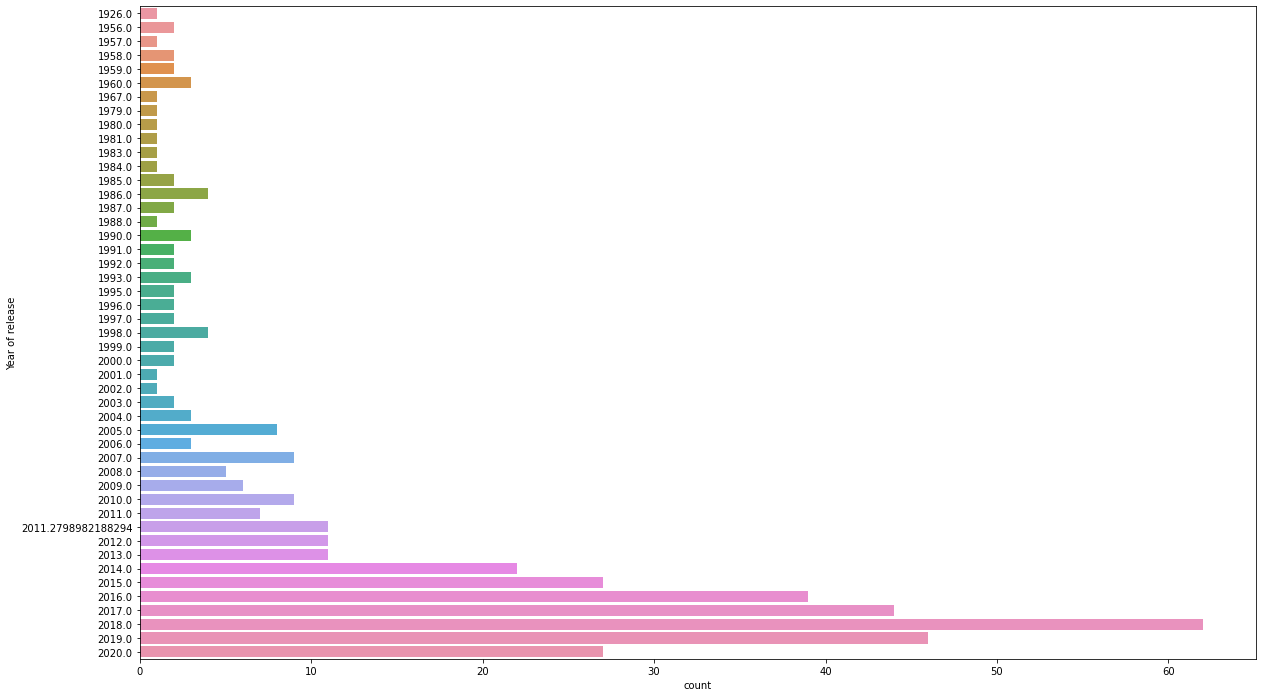

In [20]:
plt.figure(figsize = (20,12))
sns.countplot(y= 'Year of release', data = data);

The ratings have not changed much over the years while the number of shows offered on Amzon Prime have increased at a fast rate.
The number of shows before the year 2010 are below 10. The data for 2020 cannot be considered for the analysis as it does not 
take all the months into account .



# Print the number of seasons available for the shows and their counts

In [21]:
data["No of seasons available"].unique()

array([ 1.        ,  3.        ,  2.        ,  4.        ,  8.        ,
       13.        , 15.        ,  7.        ,  5.        , 10.        ,
        6.        , 17.        ,  9.        , 20.        , 12.        ,
        2.60814249])

In [22]:
data.value_counts("No of seasons available")

No of seasons available
1.000000     192
2.000000      76
3.000000      32
4.000000      28
5.000000      24
2.608142      11
6.000000      11
7.000000      11
8.000000       5
9.000000       4
10.000000      3
12.000000      2
15.000000      2
13.000000      1
17.000000      1
20.000000      1
dtype: int64

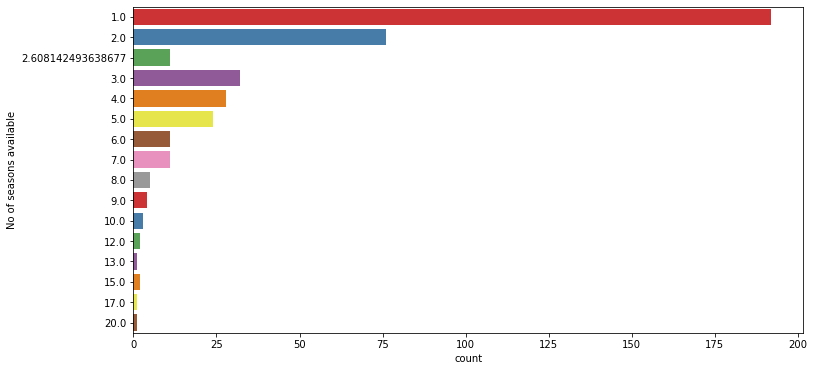

In [23]:
plt.figure(figsize = (12,6))
sns.countplot(y = 'No of seasons available', data = data,palette='Set1');

# Different languages in which movies are released on Amazon prime.

In [24]:
data["Language"].unique()

array(['Hindi', 'English', 'Telugu', 'Italiano', 'Hebrew', 'Japanese',
       'Spanish', 'Nederlands', 'Deutsch', 'French', 'Serbian', 'Russian',
       'Suomi', 'Marathi'], dtype=object)

In [25]:
m=data.value_counts("Language")
m

Language
English       325
Hindi          39
Japanese       13
Italiano        7
Spanish         6
Deutsch         2
French          2
Marathi         2
Nederlands      2
Serbian         2
Hebrew          1
Russian         1
Suomi           1
Telugu          1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Hindi'),
  Text(1, 0, 'English'),
  Text(2, 0, 'Telugu'),
  Text(3, 0, 'Italiano'),
  Text(4, 0, 'Hebrew'),
  Text(5, 0, 'Japanese'),
  Text(6, 0, 'Spanish'),
  Text(7, 0, 'Nederlands'),
  Text(8, 0, 'Deutsch'),
  Text(9, 0, 'French'),
  Text(10, 0, 'Serbian'),
  Text(11, 0, 'Russian'),
  Text(12, 0, 'Suomi'),
  Text(13, 0, 'Marathi')])

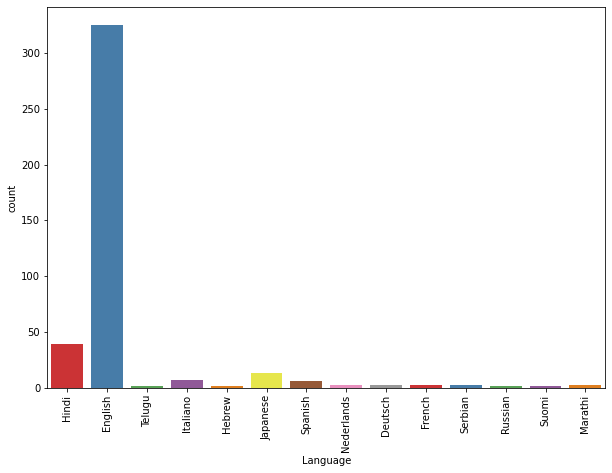

In [26]:
plt.figure(figsize = (10,7))
sns.countplot("Language", data =data,palette='Set1')
plt.xticks(rotation=90)

The highest number of shows are in English followed by Hindi. This might be because of the large taget audience as the most
common language used by people is English and then Hindi to a considerable extent.


# Type of MOvies released on Amazon Prime.

In [27]:
d=data["Genre"].unique()
d

array(['Drama', 'Sci-fi comedy', 'Drama, Comedy', 'Comedy',
       'Drama, Action', 'Drama, Romance, Comedy',
       'Arts, Entertainment, Culture', 'Sports, Drama', 'Action, Comedy',
       'Drama, Action, Suspense', 'Fantasy, Comedy', 'Drama, Suspense',
       'Sci-fi ', 'Documentary', 'Animation, Drama',
       'Sci-fi, Drama, Suspense', 'Comedy, Action',
       'Comedy, Arts, Entertainment, Culture', 'Sci-fi',
       'Drama, Horror, Romance, Suspense', 'Drama, Suspense, Horror',
       'Drama, Suspense, Fantasy', 'Comedy, Drama', 'Drama, Fantasy',
       'Drama, Horror, Suspense', 'Drama, Horror, Fantasy',
       'Drama, Suspense, Action', 'Drama, Suspense, Adventure',
       'Drama, Documentary', 'Drama, Horror', 'Drama, Sci-fi', 'Fantasy',
       'Drama, Action, Sci-fi', 'Action', 'Drama, Action, Adventure',
       'Drama, Romance', 'Drama, Comedy, Action',
       'Drama, Sci-fi, Suspense, Action',
       'Drama, LGBTQ, Arts, Entertainment, Culture', 'Horror',
       'Drama, Come

# Wordcloud showing the most frequent 'Genre released by Amazon prime'.

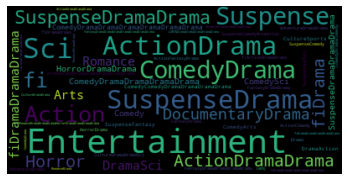

<Figure size 432x288 with 0 Axes>

In [28]:
stopwords = set(STOPWORDS)
wordcloudG=WordCloud(max_font_size=40, relative_scaling=.5,stopwords=stopwords).generate(data['Genre'].str.cat())
plt.imshow(wordcloudG, interpolation="bilinear")
plt.axis('off')
plt.margins(x=0, y=0) 
plt.show()
plt.savefig("donaldwc.png")


In [29]:
data.value_counts("Genre").head()

Genre
Drama            136
Comedy            97
Kids              29
Action            26
Drama, Comedy     15
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Sci-fi comedy'),
  Text(2, 0, 'Drama, Comedy'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Drama, Action'),
  Text(5, 0, 'Drama, Romance, Comedy'),
  Text(6, 0, 'Arts, Entertainment, Culture'),
  Text(7, 0, 'Sports, Drama'),
  Text(8, 0, 'Action, Comedy'),
  Text(9, 0, 'Drama, Action, Suspense'),
  Text(10, 0, 'Fantasy, Comedy'),
  Text(11, 0, 'Drama, Suspense'),
  Text(12, 0, 'Sci-fi '),
  Text(13, 0, 'Documentary'),
  Text(14, 0, 'Animation, Drama'),
  Text(15, 0, 'Sci-fi, Drama, Suspense'),
  Text(16, 0, 'Comedy, Action'),
  Text(17, 0, 'Comedy, Arts, Entertainment, Culture'),
  Text(18, 0, 'Sci-fi'),
  Text(19, 0, 'Drama, Horror, Romance, Suspense'),
  Text(20, 0, 'Drama, Suspense, Horror'),
  Text(21, 0, 'Drama, Suspense, Fantasy')

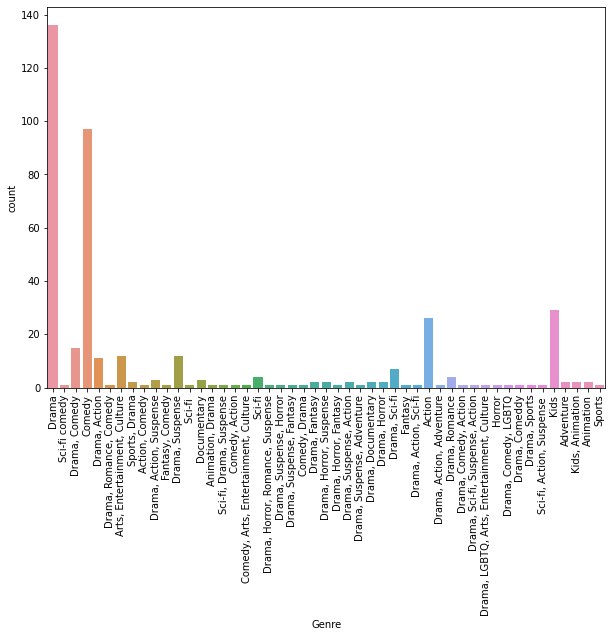

In [30]:
plt.figure(figsize = (10,7))
sns.countplot("Genre", data =data)
plt.xticks(rotation=90)

Shows of genre  Drama,comedy and are very high compared to others.

In [31]:
data["IMDb rating"].unique()

array([7.5      , 8.1      , 8.7      , 5.3      , 8.3      , 8.5      ,
       8.6      , 8.       , 7.3543956, 7.2      , 8.4      , 9.       ,
       6.5      , 8.2      , 7.8      , 7.4      , 6.2      , 7.6      ,
       7.7      , 7.1      , 7.9      , 7.       , 6.9      , 7.3      ,
       6.6      , 6.       , 6.7      , 4.       , 5.2      , 4.3      ,
       6.8      , 6.1      , 8.8      , 5.8      , 6.3      , 6.4      ,
       4.7      , 5.4      , 5.6      , 3.7      , 4.5      ])

In [32]:
data.value_counts("IMDb rating").head(10)

IMDb rating
7.354396    222
7.200000     13
8.000000     12
7.500000     10
7.300000      9
7.100000      9
8.100000      9
7.700000      8
8.200000      8
8.700000      7
dtype: int64

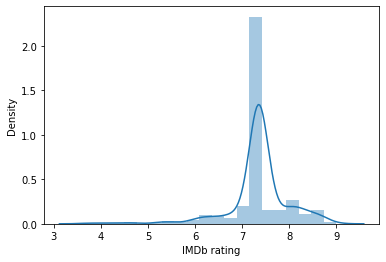

In [33]:
figsize=(20,15)
sns.distplot(data['IMDb rating']) 
plt.show()

The above graph tells us that the most common IMDB rating given to the TV shows on amazon prime is 7.3

# Unique Age of viewers/ The age group who used to watch Amazon Prime movies.

In [34]:
data["Age of viewers"].unique()

array(['18+', '16+', 'All', '13+', '7+'], dtype=object)

In [35]:
data.value_counts("Age of viewers")

Age of viewers
16+    161
18+     79
13+     69
All     67
7+      28
dtype: int64

<AxesSubplot:xlabel='Age of viewers', ylabel='count'>

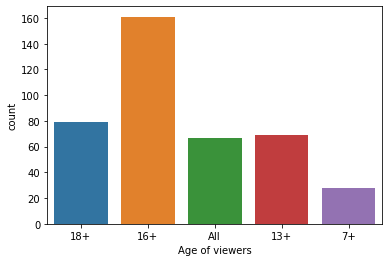

In [36]:
sns.countplot("Age of viewers", data =data)

The mostly used amazon prime is by the viewers who is 16+ in age and 2nd is 18+ age of viewers.

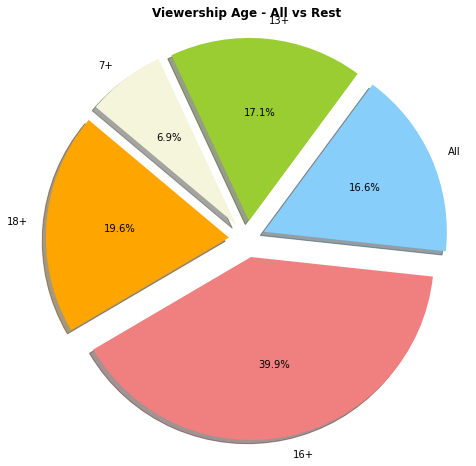

In [37]:
from collections import Counter
sizes = Counter(data['Age of viewers']).values()
labels = Counter(data['Age of viewers']).keys()


explode = (0.1, 0.1, 0.1, 0.1, 0.1)   
# Creating color parameters 
colors = ( "orange", "lightcoral", 
          "lightskyblue", "yellowgreen", "beige") 
# Plot
plt.figure(figsize=(8,8))
plt.title("Viewership Age - All vs Rest",fontweight='bold')
plt.pie(sizes, explode=explode,labels=labels, colors=colors,shadow=True,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.show()

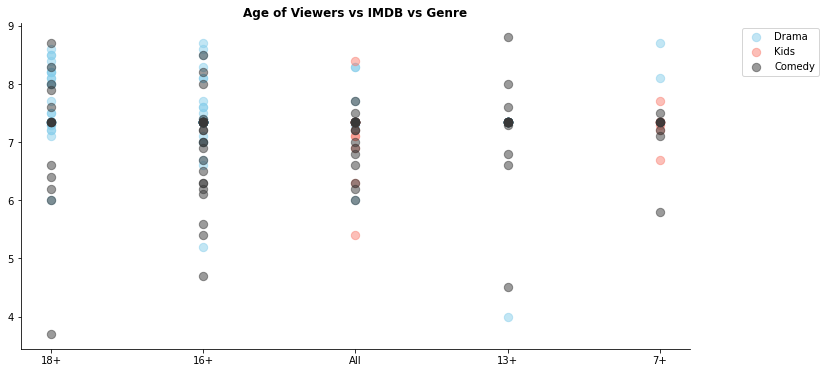

In [38]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.scatter(x='Age of viewers',y='IMDb rating',data=data[data['Genre']=='Drama'],color='skyblue',alpha=0.5,
          label='Drama',s=70)
ax.scatter(x='Age of viewers',y='IMDb rating',data=data[data['Genre']=='Kids'],color='salmon',alpha=0.5,
          label='Kids',s=70)
ax.scatter(x='Age of viewers',y='IMDb rating',data=data[data['Genre']=='Comedy'],color='#383838',alpha=0.5,
          label='Comedy',s=70)
ax.set_title("Age of Viewers vs IMDB vs Genre",fontweight='bold')

ax.legend(bbox_to_anchor=(1.2, 1))

# upper & right border remove 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Number of seasons

  * We will see top 5 series in the leaderboard with maximum number of series! After all we need more seasons right.


In [39]:
prime_seasons = data.sort_values(['No of seasons available'],axis=0,ascending=False)[:5]
prime_seasons.style.background_gradient(cmap='Blues')

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
229,Forensic Files,1998.000000,20.000000,English,Documentary,7.354396,13+
79,NCIS,2004.000000,17.000000,English,"Drama, Action",7.800000,16+
30,Grey's Anatomy,2005.000000,15.000000,English,Drama,7.600000,16+
39,Supernatural,2006.000000,15.000000,English,"Drama, Suspense, Horror",8.400000,16+
29,Doctor Who,2005.000000,13.000000,English,Sci-fi,7.354396,All


# Correlaton of variables

In [40]:
data.corr()

,Year of release,No of seasons available,IMDb rating
Year of release,1.000000,-0.211353,-0.051055
No of seasons available,-0.211353,1.000000,0.218686
IMDb rating,-0.051055,0.218686,1.000000


# Heatmap

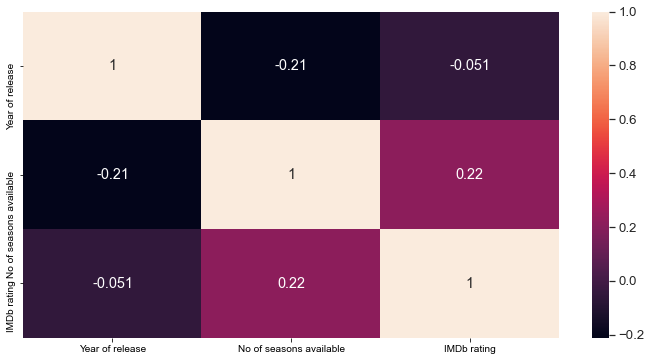

In [41]:
plt.subplots(figsize=(12,6))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(), annot=True)
plt.show()

There is a very low or moderate positive and negative relationships between the variables.

# Checking Outliers 

<AxesSubplot:xlabel='Age of viewers', ylabel='IMDb rating'>

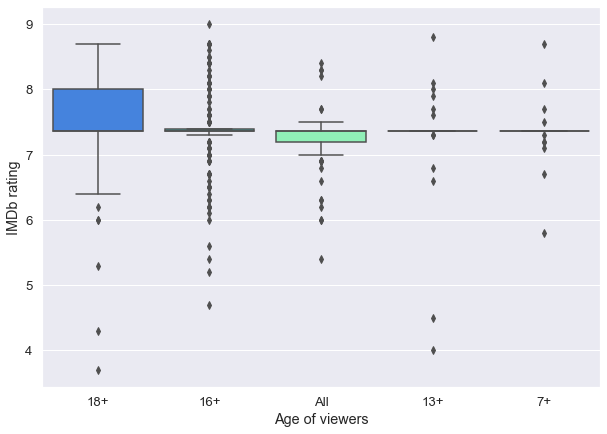

In [42]:
plt.figure(figsize = (10,7))
sns.boxplot(x ='Age of viewers',y = 'IMDb rating',data = data,palette ='rainbow')   

More number of outliers are here

# Highest rated shows on Amazon Prime

In [43]:
data.sort_values(by = 'IMDb rating', ascending = False).head(10)

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,The Test: A New Era for Australia's Team,2020.0,1.0,English,Documentary,9.0,16+
281,Seinfeld,1990.0,9.0,English,Comedy,8.8,13+
37,Hostel Daze,2019.0,1.0,Hindi,"Drama, Comedy",8.7,16+
12,The Boys,2019.0,2.0,English,"Action, Comedy",8.7,18+
340,The Grand Tour,2017.0,4.0,English,Sports,8.7,16+
51,This is Us,2017.0,3.0,English,Drama,8.7,16+
49,Downtown Abbey,2010.0,6.0,English,Drama,8.7,7+
4,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
2,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
8,The Family Man,2019.0,1.0,Hindi,"Drama, Action",8.6,18+


"The Test: A New Era for Australia's Team" is the highest rated Tv show on amazon prime.

# Lowest rated shows on Amazon Prime

In [44]:
data.sort_values(by = 'IMDb rating').head(10)

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
367,Ilana Glazer: The Planet is Burning,2020.0,1.0,English,Comedy,3.7,18+
162,Tokyo Alice,2019.0,1.0,Japanese,Drama,4.0,13+
243,Skulls and Roses,2019.0,1.0,Hindi,Action,4.3,18+
375,Businessmen VS Aliens,2018.0,1.0,Japanese,Comedy,4.5,13+
317,Alice Wettlund: My Mama is a Human and So Am I,2019.0,1.0,English,Comedy,4.7,16+
175,Final Life,2019.0,1.0,Japanese,Drama,5.2,16+
3,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
341,The Adventures of Rocky and Bullwinkle,2018.0,2.0,English,Kids,5.4,All
355,#IMomSoHard Live,2019.0,1.0,English,Comedy,5.4,16+
352,Alonzo Bodden: Heavy Lightweight,2019.0,1.0,English,Comedy,5.6,16+


 "Ilana Glazer: The Planet is Burning" is the lowest rated Tv show on amazon prime.

# Does overall IMDB fall with more number of seasons?

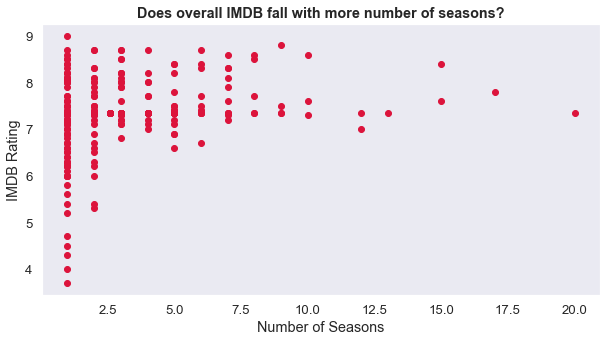

In [45]:
plt.figure(figsize=(10,5))
plt.title("Does overall IMDB fall with more number of seasons?",fontweight='bold')
plt.xlabel("Number of Seasons")
plt.ylabel("IMDB Rating")
plt.scatter(data['No of seasons available'],data['IMDb rating'],color='crimson')
plt.grid(linestyle='dotted')
plt.show()

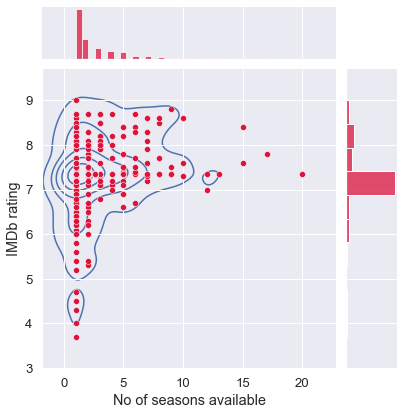

In [46]:
#Trying jointplot for these two features to understand the underlying relationship more clearly
g = (sns.jointplot("No of seasons available", "IMDb rating",data=data, color="crimson").plot_joint(sns.kdeplot, zorder=0, 
                                                                                                   n_levels=6))

* What we can see here is that, shows with more number of seasons have actually a good range of IMDB.

* For Example: Shows with more than 8 seasons are having a pretty consistent rating of more than 7 IMDB.

# Top 5 highest rated English shows and Hindi shows

### English Shows:

In [47]:
data[data['Language'] == 'English'].sort_values(by = 'IMDb rating', ascending =False).head() 

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,The Test: A New Era for Australia's Team,2020.0,1.0,English,Documentary,9.0,16+
281,Seinfeld,1990.0,9.0,English,Comedy,8.8,13+
49,Downtown Abbey,2010.0,6.0,English,Drama,8.7,7+
4,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
2,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+


### Hindi Shows:

In [48]:
data[data['Language'] == 'Hindi'].sort_values(by = 'IMDb rating', ascending =False).head() 

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
37,Hostel Daze,2019.0,1.0,Hindi,"Drama, Comedy",8.7,16+
8,The Family Man,2019.0,1.0,Hindi,"Drama, Action",8.6,18+
7,Mirzapur,2018.0,1.0,Hindi,Drama,8.5,18+
16,Breathe,2018.0,1.0,Hindi,"Drama, Suspense",8.4,16+
5,Made in Heaven,2019.0,1.0,Hindi,Drama,8.3,18+


"The Test: A New Era for Australia's Team" and "Hostel Daze" are the highest rated Tv show on amazon prime in English and Hindi
language respectively.

#   Show with maximum number of seasons

In [49]:
data[data['No of seasons available'] == data['No of seasons available'].max()]

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
229,Forensic Files,1998.0,20.0,English,Documentary,7.354396,13+


# Highest rated shows with 5 seasons or more

In [50]:
data[data["No of seasons available"]>=10].sort_values("IMDb rating",ascending=False).head(10)

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
47,Shameless,2011.0,10.0,English,"Comedy, Drama",8.600000,18+
39,Supernatural,2006.0,15.0,English,"Drama, Suspense, Horror",8.400000,16+
79,NCIS,2004.0,17.0,English,"Drama, Action",7.800000,16+
30,Grey's Anatomy,2005.0,15.0,English,Drama,7.600000,16+
100,Blue Bloods,2011.0,10.0,English,Drama,7.600000,16+
29,Doctor Who,2005.0,13.0,English,Sci-fi,7.354396,All
229,Forensic Files,1998.0,20.0,English,Documentary,7.354396,13+
259,The Big Bang Theory,2008.0,12.0,English,Comedy,7.354396,13+
118,Hawaii Five-O,2011.0,10.0,English,"Drama, Action",7.300000,16+
267,Two and a Half Men,2003.0,12.0,English,Comedy,7.000000,16+


# Maximum year of shows

In [51]:
sort_year=data.sort_values("Year of release",ascending=False)
sort_year

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,Pataal Lok,2020.0,1.0,Hindi,Drama,7.500000,18+
32,Afsos,2020.0,1.0,Hindi,"Drama, Comedy",7.354396,16+
269,Russell Peters: Deported,2020.0,1.0,English,Comedy,6.100000,16+
361,Rob Delaney: Jackie,2020.0,1.0,English,Comedy,6.400000,18+
286,Jimmy O. Yang: Good Deal,2020.0,1.0,English,"Arts, Entertainment, Culture",7.100000,18+
...,...,...,...,...,...,...,...
373,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.200000,All
250,The Buccaneers,1957.0,1.0,English,Action,7.354396,13+
242,The Adventures of Robin Hood,1956.0,4.0,English,Adventure,7.354396,13+
184,Coloner March of Scotland Yard,1956.0,1.0,English,Drama,7.354396,7+


 Maximum year of show is 2020.

# YEAR OF RELEASE

In [52]:
### The oldest show

In [53]:
data.loc[data['Year of release']==data['Year of release'].min()]

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
201,The Cecil B. DeMille Classics Collection,1926.0,1.0,English,Drama,7.354396,13+


* Earlier when we plotted the statistical data, we found that the oldest show was released in the year 1926. 
* To end the curiosity we have extracted the details and the oldest show is "The Cecil B. DeMille Classics Collection".

# Extract data from 2001 to 2020

In [54]:
year2001_2020=sort_year[sort_year["Year of release"]>2000]
year2001_2020

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,Pataal Lok,2020.0,1.0,Hindi,Drama,7.500000,18+
32,Afsos,2020.0,1.0,Hindi,"Drama, Comedy",7.354396,16+
269,Russell Peters: Deported,2020.0,1.0,English,Comedy,6.100000,16+
361,Rob Delaney: Jackie,2020.0,1.0,English,Comedy,6.400000,18+
286,Jimmy O. Yang: Good Deal,2020.0,1.0,English,"Arts, Entertainment, Culture",7.100000,18+
...,...,...,...,...,...,...,...
325,The Simple Life,2004.0,4.0,English,Comedy,7.354396,16+
267,Two and a Half Men,2003.0,12.0,English,Comedy,7.000000,16+
379,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.800000,All
174,Shackleton: Trapped in the South Pole,2002.0,1.0,English,Drama,7.354396,16+


In [55]:
year2001_2020.sort_values(["IMDb rating"],ascending=False)

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,The Test: A New Era for Australia's Team,2020.0,1.0,English,Documentary,9.0,16+
37,Hostel Daze,2019.0,1.0,Hindi,"Drama, Comedy",8.7,16+
2,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
340,The Grand Tour,2017.0,4.0,English,Sports,8.7,16+
4,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...
317,Alice Wettlund: My Mama is a Human and So Am I,2019.0,1.0,English,Comedy,4.7,16+
375,Businessmen VS Aliens,2018.0,1.0,Japanese,Comedy,4.5,13+
243,Skulls and Roses,2019.0,1.0,Hindi,Action,4.3,18+
162,Tokyo Alice,2019.0,1.0,Japanese,Drama,4.0,13+


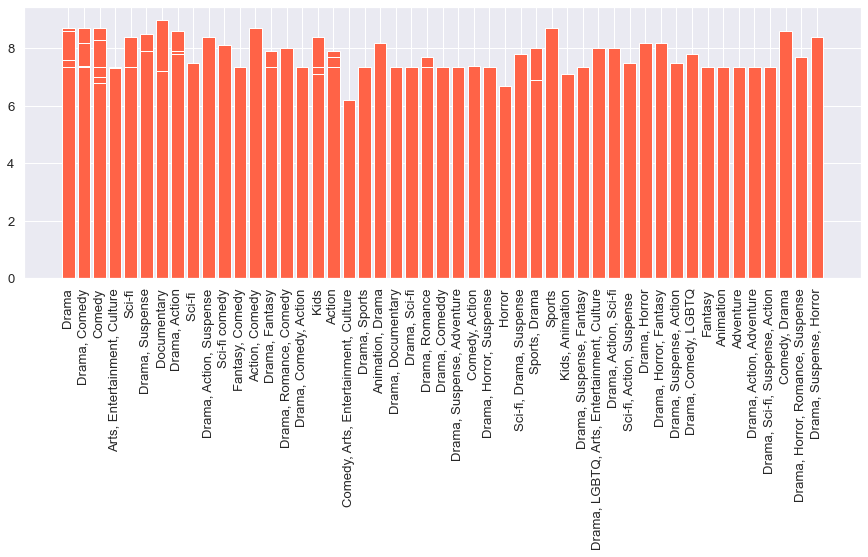

In [56]:
plt.figure(figsize=(15,5))
plt.bar(year2001_2020['Genre'],year2001_2020['IMDb rating'],color='tomato')



plt.xticks(rotation=90)
plt.show()

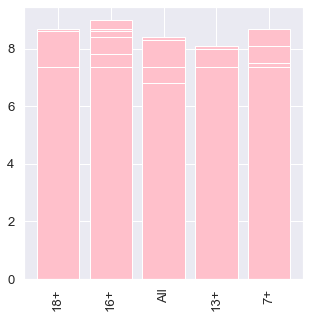

In [57]:
plt.figure(figsize=(5,5))
plt.bar(year2001_2020['Age of viewers'],year2001_2020['IMDb rating'],color='pink')



plt.xticks(rotation=90)
plt.show()

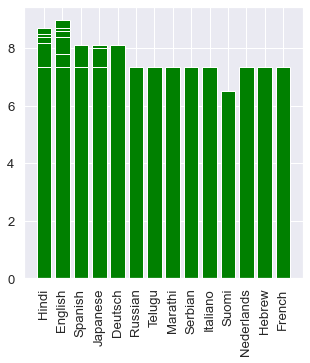

In [58]:
plt.figure(figsize=(5,5))
plt.bar(year2001_2020['Language'],year2001_2020['IMDb rating'],color='green')



plt.xticks(rotation=90)
plt.show()

# Details for year 2020

In [59]:
prime_latest = data.loc[data['Year of release']==data['Year of release'].max()]
prime_latest.style.background_gradient(cmap='Greens')

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,Pataal Lok,2020.000000,1.000000,Hindi,Drama,7.500000,18+
1,Upload,2020.000000,1.000000,English,Sci-fi comedy,8.100000,16+
14,Hunters,2020.000000,1.000000,English,"Drama, Action, Suspense",7.200000,18+
17,The Forgotten Army- Azaadi ke Liye,2020.000000,1.000000,Hindi,"Drama, Action",8.000000,18+
19,Tales from the Loop,2020.000000,1.000000,English,Sci-fi,7.500000,18+
20,The Test: A New Era for Australia's Team,2020.000000,1.000000,English,Documentary,9.000000,16+
32,Afsos,2020.000000,1.000000,Hindi,"Drama, Comedy",7.354396,16+
73,Star Trek: Picard,2020.000000,1.000000,English,Sci-fi,7.600000,18+
104,Dispatches from Elsewhere,2020.000000,1.000000,English,"Drama, Suspense",7.354396,16+
141,El Presidente,2020.000000,1.000000,Spanish,Drama,7.354396,All


# IMDb rating w.r.t Year of release

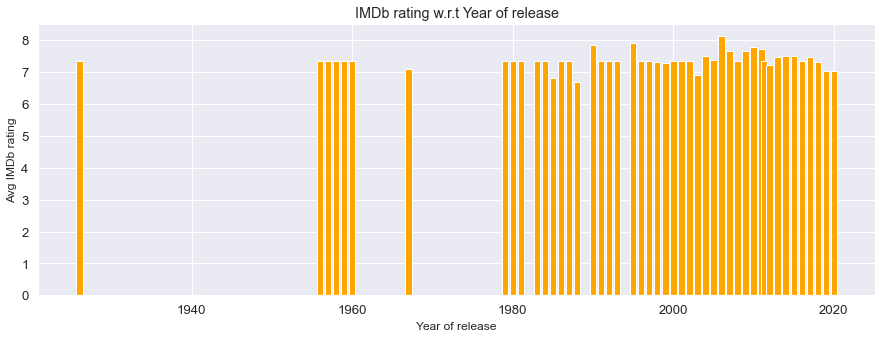

In [60]:
plt.figure(figsize=(15,5))
plt.bar(data.groupby('Year of release')['Year of release'].count().index,data.groupby('Year of release')['IMDb rating'].mean()
        ,color="orange")
plt.xlabel("Year of release",fontsize=12)
plt.ylabel("Avg IMDb rating",fontsize=12)
plt.title("IMDb rating w.r.t Year of release")
plt.show()

# No of seasons available w.r.t Year of release

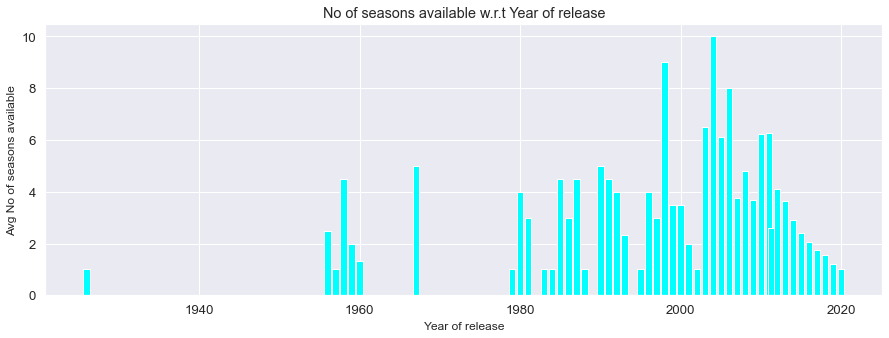

In [61]:
plt.figure(figsize=(15,5))
plt.bar(data.groupby('Year of release')['Year of release'].count().index,data.groupby('Year of release')
        ['No of seasons available'].mean(),color="cyan")
plt.xlabel("Year of release",fontsize=12)
plt.ylabel("Avg No of seasons available",fontsize=12)
plt.title("No of seasons available w.r.t Year of release")
plt.show()

# IMDb rating w.r.t Language

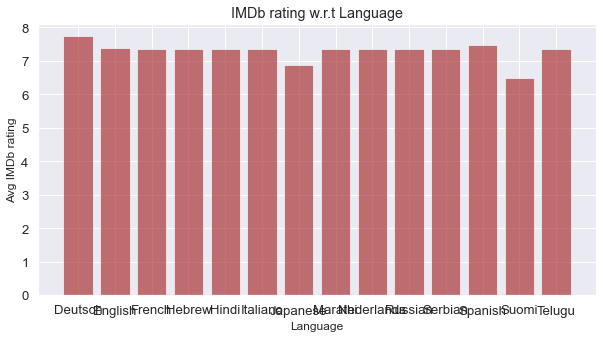

In [62]:
plt.figure(figsize=(10,5))
plt.bar(data.groupby('Language')['Language'].count().index,data.groupby('Language')['IMDb rating'].mean(),
        alpha=0.65,color="brown")
plt.xlabel("Language",fontsize=12)
plt.ylabel("Avg IMDb rating",fontsize=12)
plt.title("IMDb rating w.r.t Language")
plt.show()

# Pairplot with hue is language

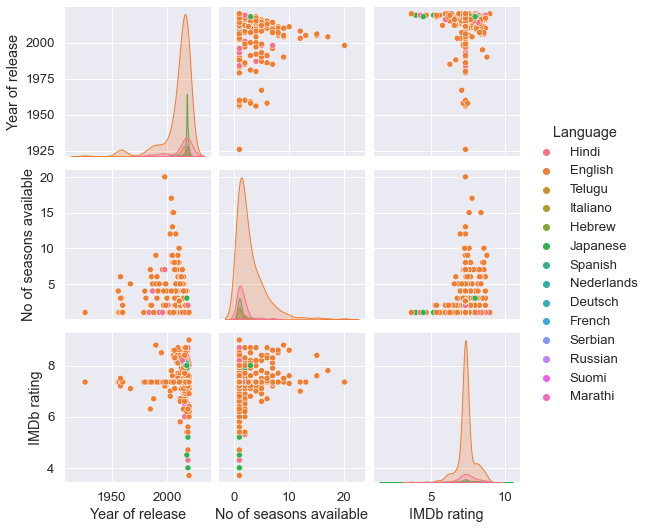

In [63]:
sns.pairplot(data,hue="Language")

From the above graph we can say that 'data is not linearly related and also not normally distributed'.

# Scatterplot of IMDb rating vs Year of release

Text(0.5, 1.0, 'IMDb rating vs Year of release')

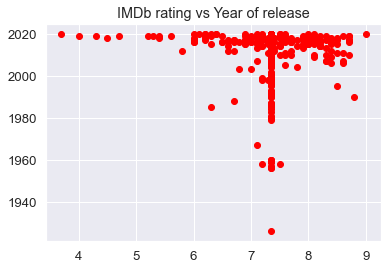

In [64]:
plt.scatter(data["IMDb rating"], data["Year of release"],color="red")
plt.title("IMDb rating vs Year of release")


# Histogram

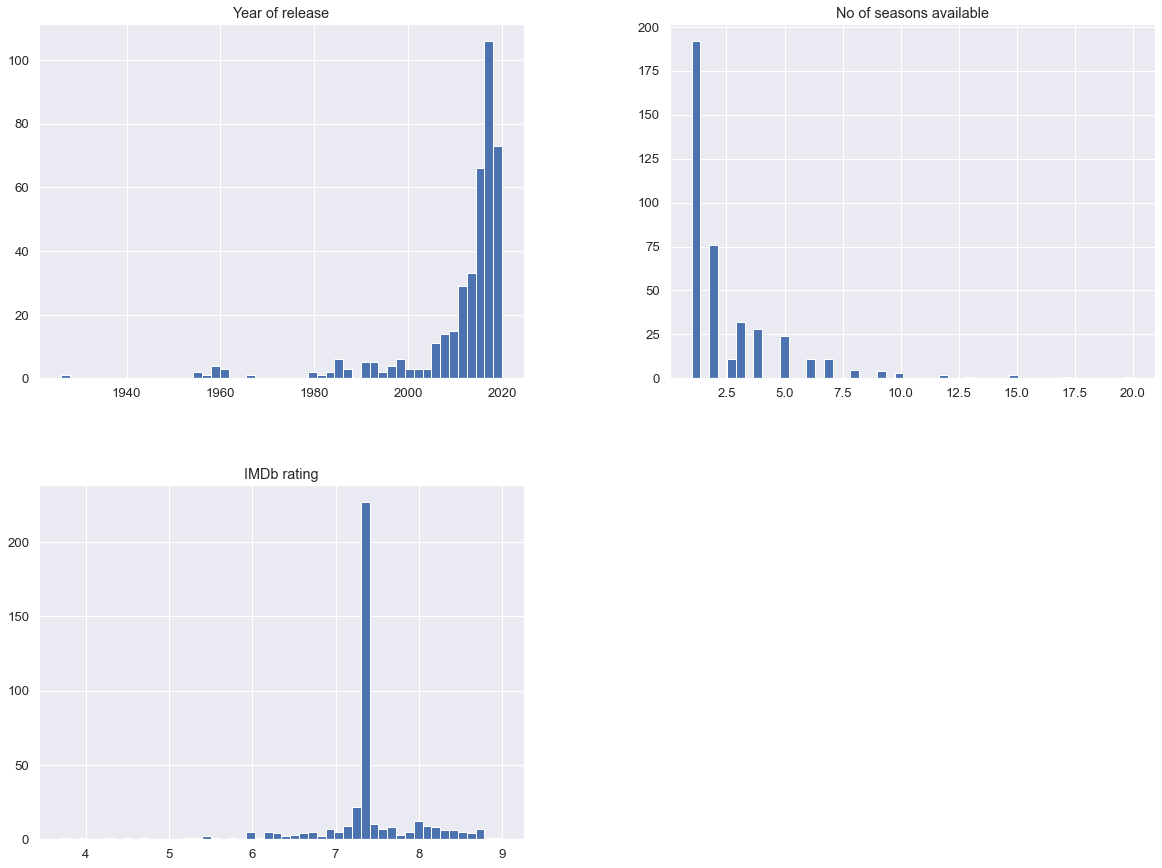

In [65]:
data.hist(bins=50,figsize=(20,15))
plt.show()

 The year of release is positively distributed that is, release is increased in amazon prime as the time goes 
 i.e we can say that amazon prime has amazing growth with the time.


#  Conclusion

The number of shows before the year 2010 are below 10. The data for 2020 cannot be considered for the analysis as it does not
take all the months into account .
Shows with less number of seasons, mostly 1 or 2 seasons are the highest. Shows with more than 12 seasons, are very less in
number.
"Forensic Files " is the Tv show with highest number of seasons(here,20) on amazon prime.
The highest number of shows are in English followed by Hindi. This might be because of the large taget audience as the most
common language used by people is English and then Hindi to a considerable extent.
"The Test: A New Era for Australia's Team" and "Hostel Daze" are the highest rated Tv show on amazon prime in English and Hindi
language respectively.

Shows of genre Drama,comedy and are very high compared to others.
The most common IMDB rating given to the TV shows on amazon prime is 7.3
The mostly used amazon prime is by the viewers who is 16+ in age and 2nd is 18+ age of viewers.
"The Test: A New Era for Australia's Team" is the highest rated Tv show on amazon prime.
"Ilana Glazer: The Planet is Burning" is the lowest rated Tv show on amazon prime.

Earlier when we plotted the statistical data, we found that the oldest show was released in the year 1926.
To end the curiosity we have extracted the details and the oldest show is "The Cecil B. DeMille Classics Collection".
The year of release is positively distributed that is, release is increased in amazon prime as the time goes i.e we can say
that amazon prime has amazing growth with the time.
